In [2]:
%matplotlib inline
import sklearn
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas
import pylab
from datasets.synbols import Synbols
import seaborn as sns
import json

{'path': '/mnt/datasets/public/research/synbols/latin_res=32x32_n=100000.npz',
 'split': 'train',
 'x': array([[[[ 76,  25,  90],
          [ 72,  21,  82],
          [ 72,  22,  88],
          ...,
          [ 37,  32, 127],
          [ 38,  31, 126],
          [ 32,  29, 127]],
 
         [[ 72,  13,  87],
          [ 72,  17,  84],
          [ 72,  24,  84],
          ...,
          [ 38,  36, 120],
          [ 32,  30, 121],
          [ 31,  33, 122]],
 
         [[ 72,  21,  82],
          [ 71,  19,  82],
          [ 69,  21,  86],
          ...,
          [ 37,  32, 119],
          [ 35,  34, 123],
          [ 33,  29, 126]],
 
         ...,
 
         [[ 43,  26, 107],
          [ 43,  33, 117],
          [ 35,  33, 109],
          ...,
          [ 10,  40, 126],
          [ 10,  36, 125],
          [  2,  38, 126]],
 
         [[ 42,  32, 118],
          [ 37,  30, 118],
          [ 39,  33, 113],
          ...,
          [  8,  36, 126],
          [  4,  40, 121],
          [

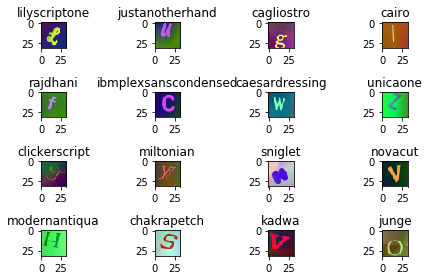

In [3]:
dataset = Synbols('/mnt/datasets/public/research/synbols/latin_res=32x32_n=100000.npz', "train", "font")
w = 4
h = 4
for i in range(h):
    for j in range(w):
        n = i * h + j
        pylab.subplot(h, w, n + 1)
        pylab.imshow(dataset[n][0])
        pylab.title(dataset.labelset[dataset[n][1]])
pylab.tight_layout()
vars(dataset)

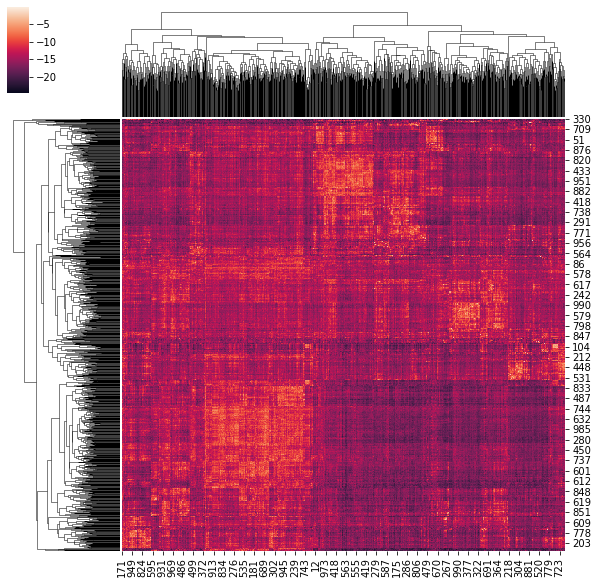

In [37]:
import torch.nn.functional as F
import torch
loaded = np.load('/mnt/projects/vision_prototypes/synbols/logs/6a02fee9a453cf13e59eef0fbbddb2bd/resnet18_preds.npy', allow_pickle=True).item()
probs = F.softmax(torch.from_numpy(loaded['logits']), dim=-1).numpy()
confmat = np.zeros((probs.shape[1], probs.shape[1]))
count = np.zeros((probs.shape[1], probs.shape[1]))

for i, p in zip(loaded['targets'], probs):
    confmat[i] += np.log(p)
    count[i] += 1
confmat = confmat / count
# confmat = confusion_matrix(loaded['targets'], preds, labels=np.arange(1001))
# confmat *= 1 - np.eye(confmat.shape[0], dtype=int)
# confmat =  np.triu(confmat, 1) + np.tril(confmat, -1).transpose()

# distance = np.triu(confmat, 1) + np.tril(confmat, -1).transpose()
# distance = (1 / (1 + distance) ** 2)

sns.clustermap(confmat, metric='euclidean')

# examples = []
# for j in range(probs.shape[1]):
#     examples.append(dataset.x[np.random.choice(np.where(dataset.y == j)[0])])

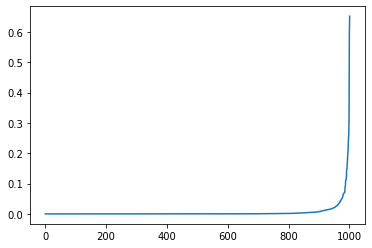

In [20]:
pylab.plot(np.sort(confmat[0]))

<Figure size 432x288 with 0 Axes>

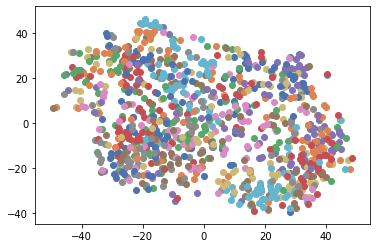

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.decomposition import PCA
import seaborn as sns

tsne = TSNE(metric='cosine')
# x = np.array([probs[loaded['targets'] == j].mean(0) for j in range(probs.shape[1])])
x = confmat
y = np.arange(probs.shape[1])
x = tsne.fit_transform(x)
x = x + np.random.randn(x.shape[0]*2).reshape((x.shape[0], 2))
n_clusters = 100
model = AgglomerativeClustering(n_clusters=n_clusters, affinity="precomputed", linkage="complete")
clusters = model.fit(distance)
palette = sns.color_palette('deep', n_clusters)
pylab.figure()

pylab.figure()
for i, l in enumerate(np.unique(clusters.labels_)):
#     pylab.scatter(x[:, 0], x[:, 1])
#     print(l)
    mask = clusters.labels_ == l
    pylab.scatter(x[mask, 0], x[mask, 1], color=palette[i])
    



In [66]:
confused = confmat.sum(-1)
top4 = confused.argsort()[-4:]
print(top4)

[712 524 286 319]


<IPython.core.display.Javascript object>


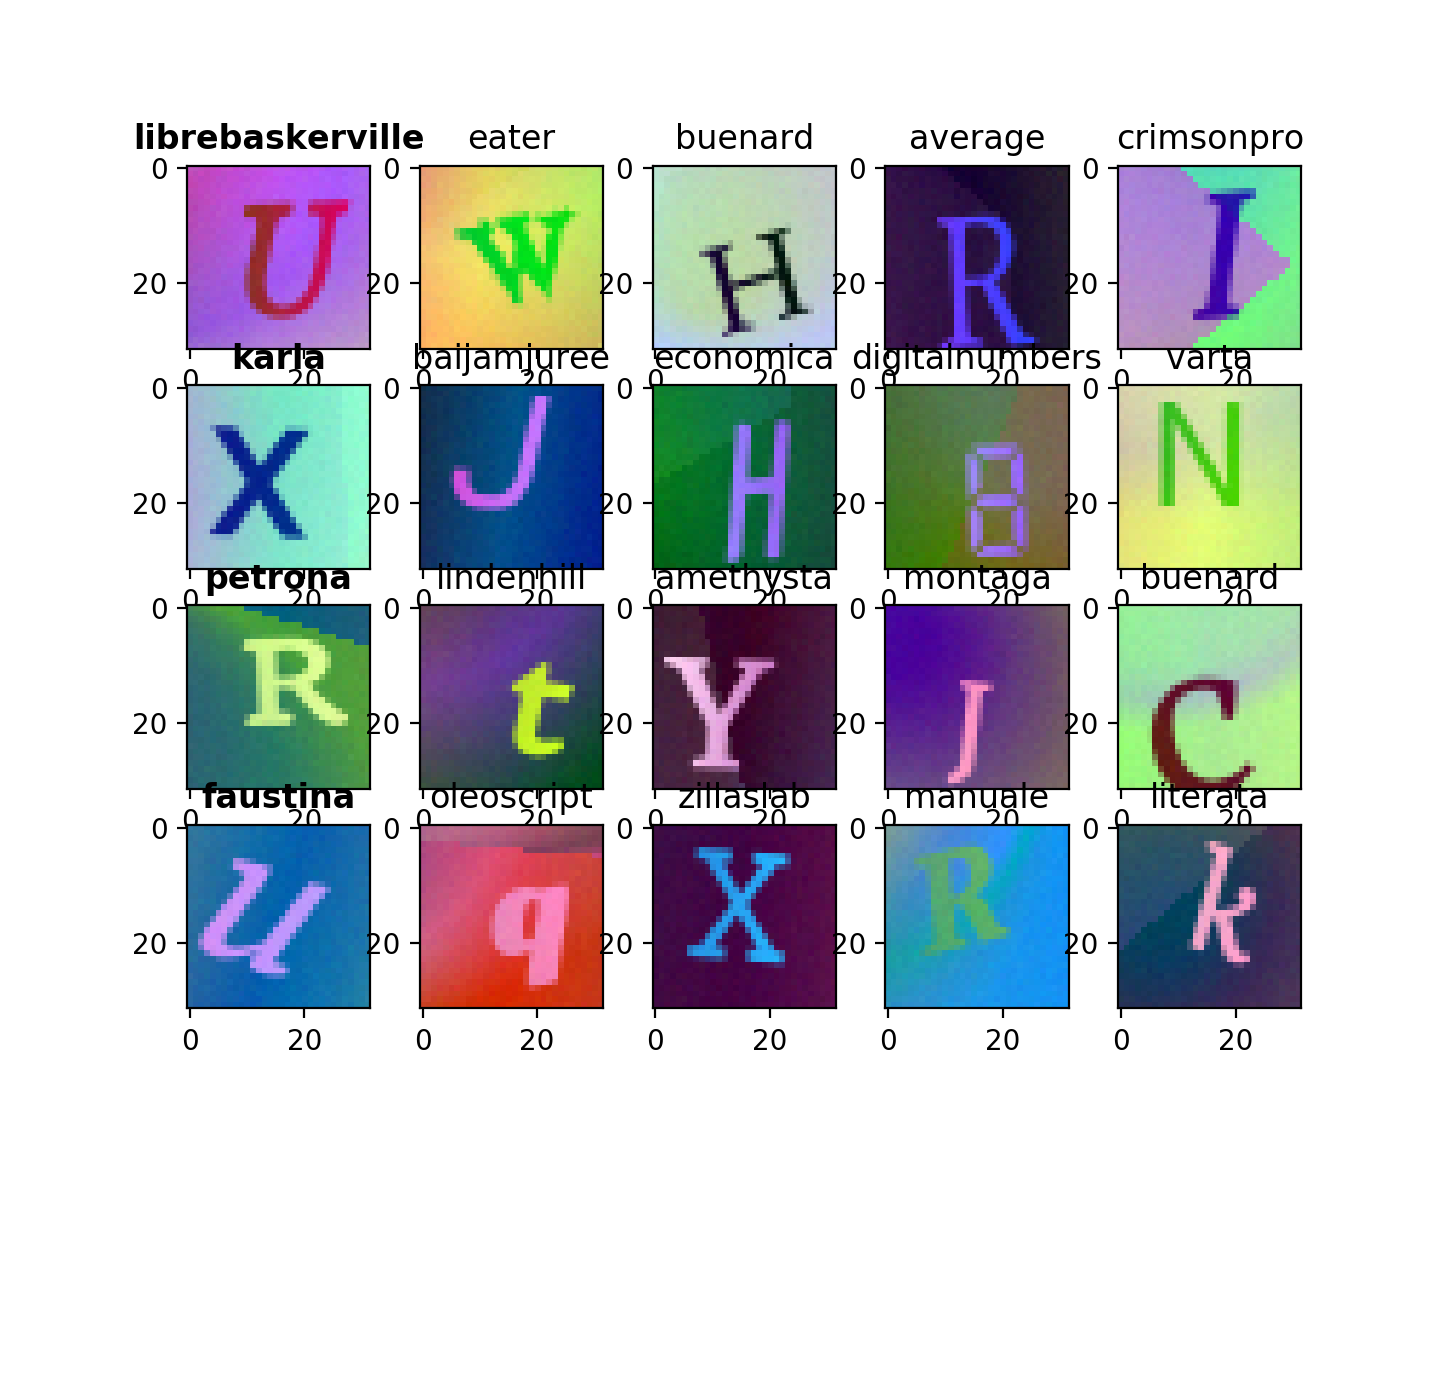

In [87]:
pylab.figure()
for _i, i in enumerate(top4):
    row = confmat[i]
    top4_cols = row.argsort()[-4:]
    im = dataset.x[np.random.choice(np.where(dataset.y == i)[0])]
    pylab.subplot(5, 5, _i * 5 + 1)
    pylab.imshow(im)
    pylab.title(dataset.labelset[i], fontweight='bold')
    for _j, j in enumerate(top4_cols):
        pylab.subplot(5, 5, _i * 5 + _j + 2)
        pylab.imshow(dataset.x[np.random.choice(np.where(dataset.y == j)[0])])
        pylab.title("%s" % dataset.labelset[j])
    

<IPython.core.display.Javascript object>


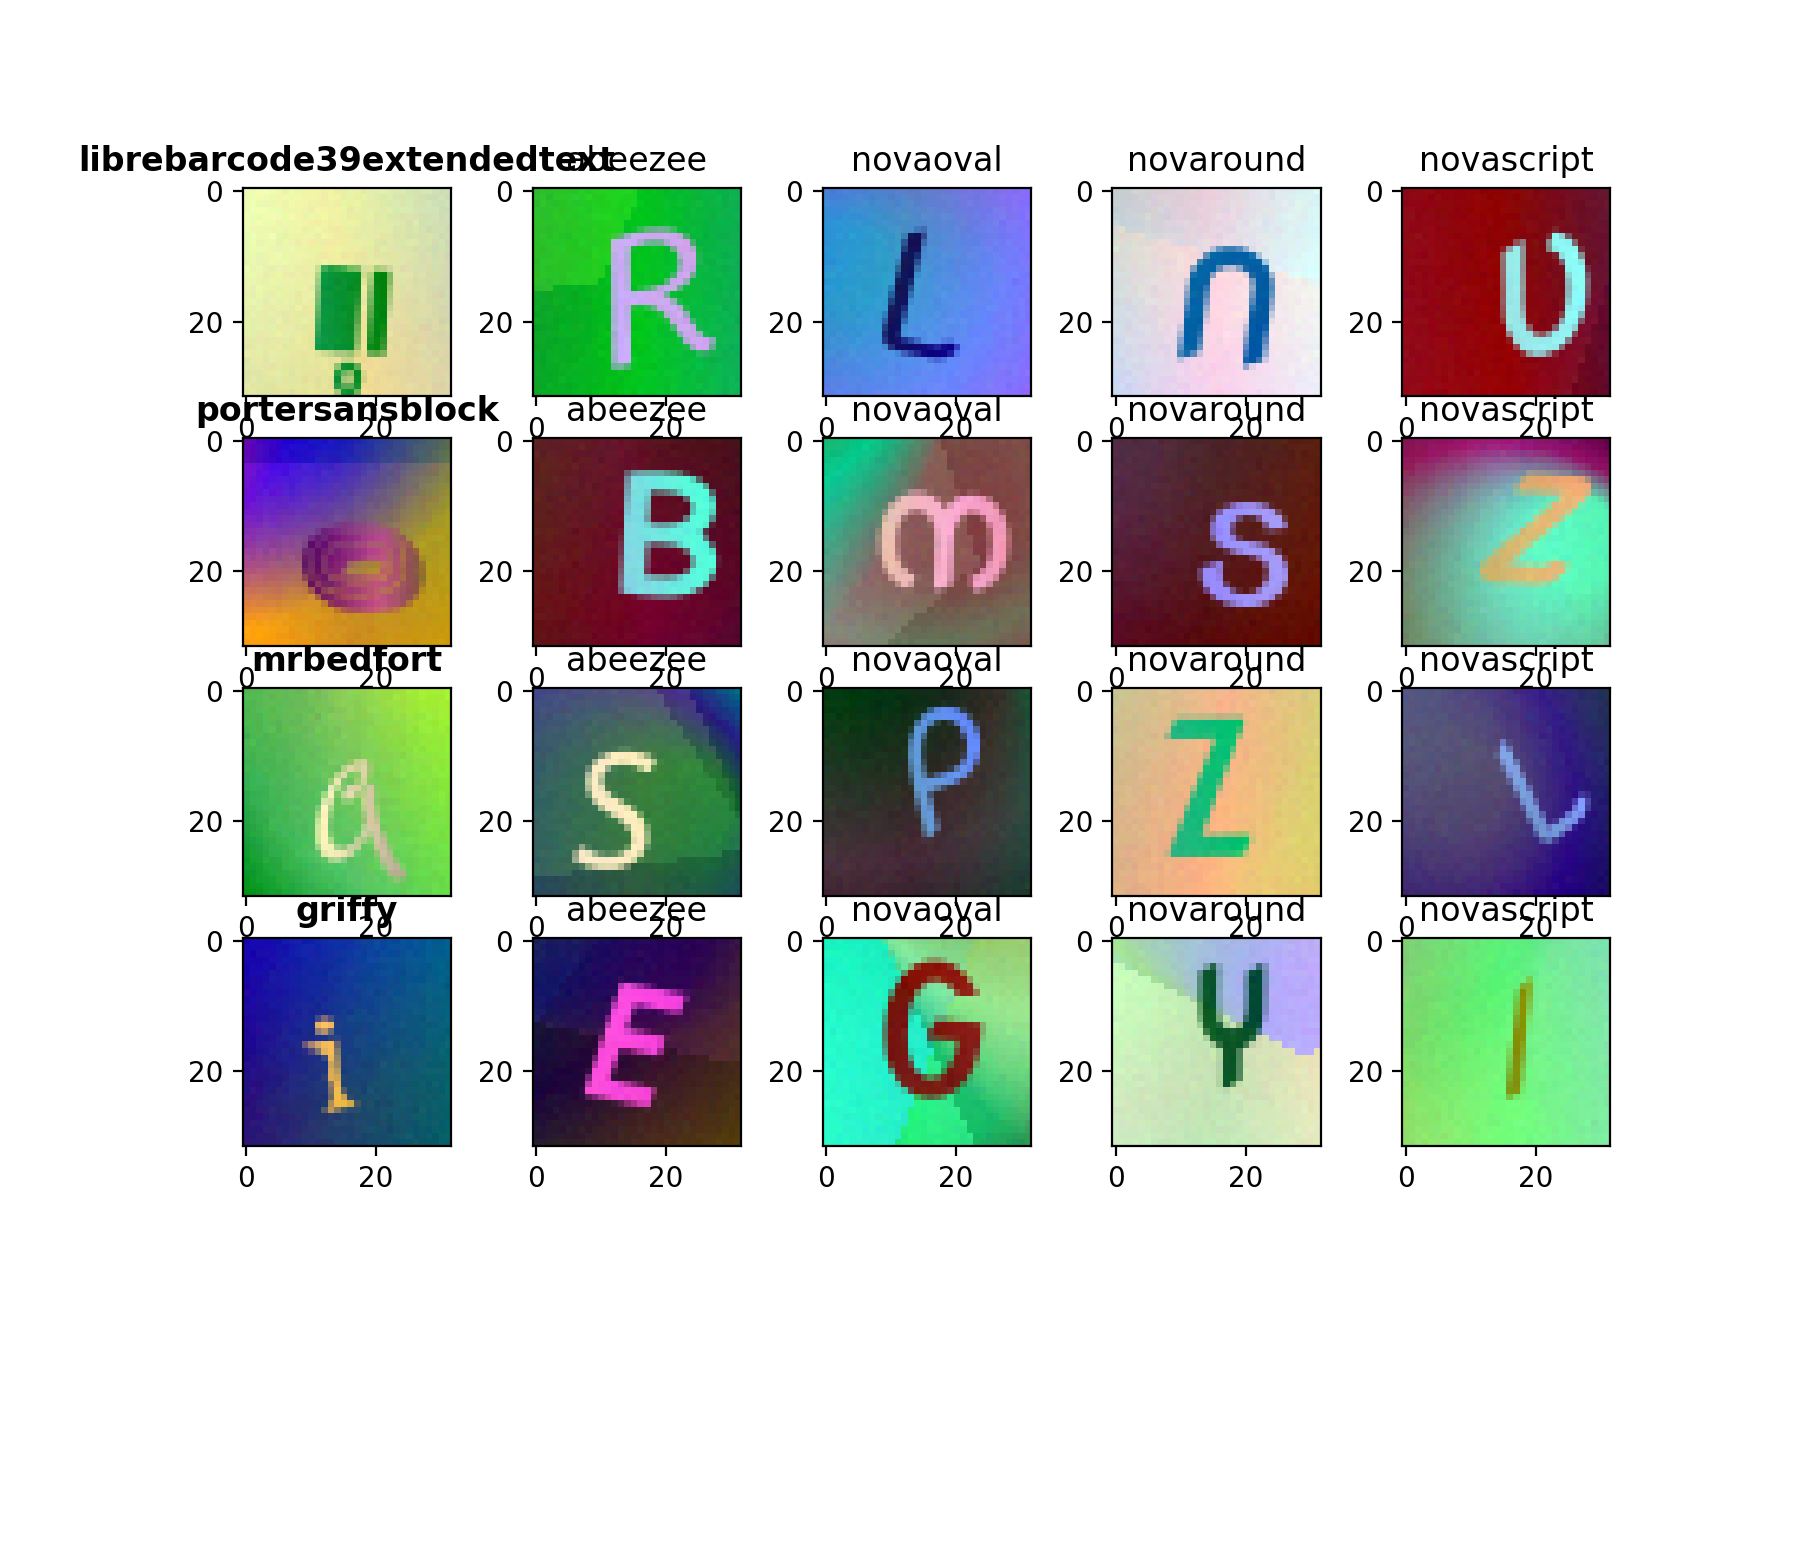

In [75]:
top4 = confused.argsort()[:4]
pylab.figure()
for _i, i in enumerate(top4):
    row = confmat[i]
    top4_cols = row.argsort()[:4]
    im = dataset.x[np.random.choice(np.where(dataset.y == i)[0])]
    pylab.subplot(5, 5, _i * 5 + 1)
    pylab.imshow(im)
    pylab.title(dataset.labelset[i], fontweight='bold')
    for _j, j in enumerate(top4_cols):
        pylab.subplot(5, 5, _i * 5 + _j + 2)
        pylab.imshow(dataset.x[np.random.choice(np.where(dataset.y == j)[0])])
        pylab.title("%s" % dataset.labelset[j])
    

In [88]:
labels = list(np.array(dataset.labelset)[confused.argsort()])
for s,l in zip(np.sort(confused)[::-1], labels[::-1]):
    print(s, l)


24 faustina
19 petrona
18 karla
18 librebaskerville
18 ebgaramond
18 rugeboogie
17 rumraisin
17 publicsans
17 kiranghaerang
17 titilliumweb
17 rokkitt
17 balootamma2
17 zillaslab
17 bentham
16 nobile
16 roboto
16 rougescript
16 archivonarrow
16 smythe
16 jotione
16 averiagruesalibre
16 rosarivo
16 abhayalibre
16 cairo
16 cormorantinfant
16 signika
16 dosis
16 zeyada
15 allerta
15 mysteryquest
15 lancelot
15 craftygirls
15 baloo
15 inika
15 dekko
15 athiti
15 varela
15 viga
15 oleoscriptswashcaps
15 mousememoirs
15 hindjalandhar
15 odibeesans
15 trocchi
15 mada
15 balootammudu
15 imfellgreatprimersc
15 baloothambi
15 sueellenfrancisco
14 ibmplexsans
14 imfelldoublepica
14 imfellenglishsc
14 fenix
14 tajawal
14 jsmathcmsy10
14 timmana
14 robotomono
14 galada
14 tenaliramakrishna
14 b612mono
14 cutive
14 niramit
14 elmessiri
14 vibes
14 lora
14 offside
14 opensanscondensed
14 vt323
14 baloobhaina2
14 barrio
14 mali
14 postnobillscolombo
14 uncialantiqua
14 zhimangxing
14 badscript
14 merr

4 courgette
4 thasadith
4 tangerine
4 gorditas
4 sedgwickavedisplay
4 stintultracondensed
4 specialelite
4 sonsieone
4 coda
4 shrikhand
4 hindmysuru
4 sevillana
4 chilanka
4 keaniaone
4 kameron
4 lakkireddy
4 playfairdisplaysc
4 ntr
4 mrssheppards
4 mrssaintdelafield
4 barriecito
4 lexendmega
4 bungeeinline
4 paprika
4 passionone
4 montserrat
4 lemon
4 modak
4 piedra
4 pirataone
4 bungeeshade
4 kumarone
4 medulaone
4 megrim
4 loveyalikeasister
4 bigshouldersdisplay
4 boogaloo
4 poetsenone
4 majormonodisplay
4 miniver
3 actor
3 newscycle
3 sitara
3 bungeeoutline
3 devonshire
3 fontdinerswanky
3 giveyouglory
3 warnes
3 berkshireswash
3 gafata
3 londrinaoutline
3 literata
3 vesperlibre
3 unifrakturmaguntia
3 pridi
3 labelleaurore
3 cevicheone
3 petitformalscript
3 ribeye
3 artifika
3 caveatbrush
3 cambo
3 redactedscript
3 calistoga
3 librebarcode128
3 risque
3 seaweedscript
3 librebarcode128text
3 rakkas
3 share
2 redacted
2 asset
2 cutivemono
2 kavoon
2 mirza
2 pressstart2p
2 fasterone
2